In [192]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")


In [193]:
# Cargar los archivos Parquet, al dataset completo lo usaremos para la recomendacion
df_completo = pd.read_parquet(r'..\Datasets\dataset_completo.parquet')

In [194]:
# Seleccionar las columnas relevantes
columnas_seleccionadas = ['title', 'generos', 'nombre_coleccion', 'budget', 'revenue', 'vote_count',
                          'popularity', 'vote_average', 'production_companies_clean', 'release_date',
                          'release_year']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_completo = df_completo[columnas_seleccionadas].copy() 

In [195]:
# Verificar que todas las cadenas estén correctamente formateadas
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   title                       1507 non-null   object        
 1   generos                     1507 non-null   object        
 2   nombre_coleccion            1507 non-null   object        
 3   budget                      1507 non-null   int32         
 4   revenue                     1507 non-null   int32         
 5   vote_count                  1507 non-null   float64       
 6   popularity                  1507 non-null   float64       
 7   vote_average                1507 non-null   float64       
 8   production_companies_clean  1507 non-null   object        
 9   release_date                1507 non-null   datetime64[ns]
 10  release_year                1507 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(4)
me

In [196]:
# Verificar el porcentaje de valores faltantes en todas las columnas seleccionadas
missing_data = df_completo[['title', 'generos', 'popularity', 'vote_average', 'production_companies_clean', 'release_date']].isnull().mean() * 100

# Mostrar el porcentaje de valores faltantes
print(missing_data)


title                         0.0
generos                       0.0
popularity                    0.0
vote_average                  0.0
production_companies_clean    0.0
release_date                  0.0
dtype: float64


In [197]:
# No podriamos filtrar por nombre de coleccion porque tenemos pocos datos, 76 de 1500
df_con_datos_disponibles = df_completo[df_completo['nombre_coleccion'] != 'Dato no disponible']
print(df_con_datos_disponibles['nombre_coleccion'].count())
print(df_completo['nombre_coleccion'].count())

76
1507


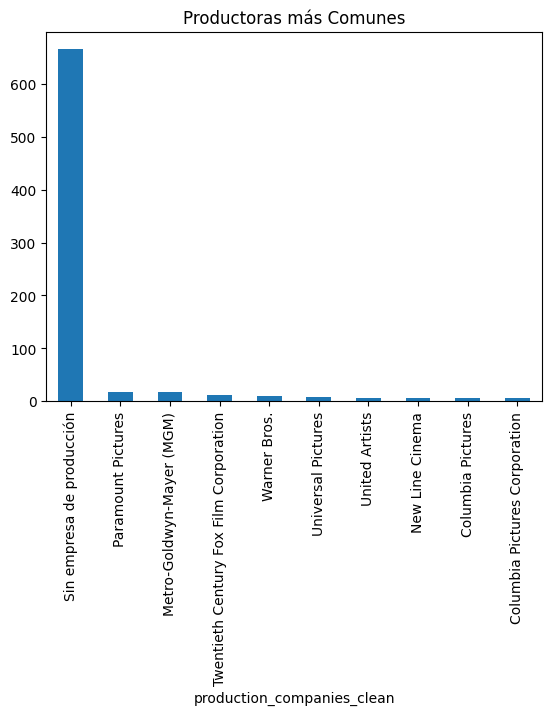

In [198]:
# dado que contamos con pocos datos en las empresas de produccion no se las va a considerar
df_completo['production_companies_clean'].value_counts().head(10).plot(kind='bar', title="Productoras más Comunes")
plt.show()

In [199]:
# Eliminar las columnas 'production_companies_clean' y 'nombre_coleccion'
df_completo = df_completo.drop(columns=['production_companies_clean', 'nombre_coleccion'])

In [200]:
# Calcular el porcentaje de 0s en cada columna relevante, teniendo en cuenta que los pusimos anteriormente para rellenar nulos, dada la salida 'budget' y 'revenue' nos indica que no disponemos de datos basicamente.
for col in ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']:
    porcentaje_cero = (df_completo[col] == 0).mean() * 100
    print(f"El porcentaje de 0s en la columna '{col}' es: {porcentaje_cero:.2f}%")

El porcentaje de 0s en la columna 'budget' es: 85.27%
El porcentaje de 0s en la columna 'revenue' es: 87.79%
El porcentaje de 0s en la columna 'popularity' es: 0.00%
El porcentaje de 0s en la columna 'vote_average' es: 4.91%
El porcentaje de 0s en la columna 'vote_count' es: 4.71%


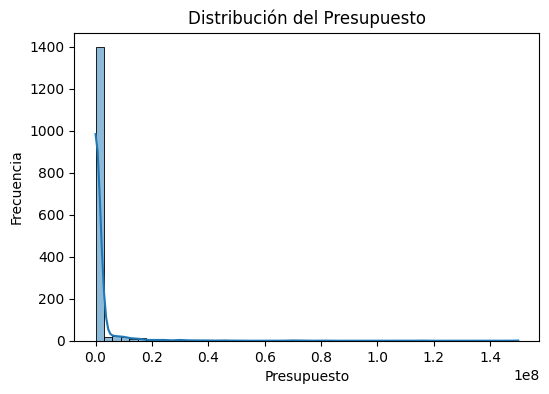

In [201]:
# Cambiar el backend de matplotlib a inline para Jupyter Notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# Distribución del presupuesto
plt.figure(figsize=(6, 4))
sns.histplot(df_completo['budget'], bins=50, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

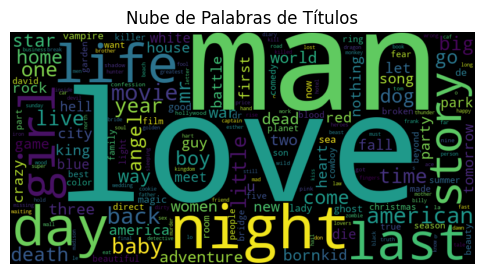

In [202]:
# las palabras más usada en los titulos
wordcloud = WordCloud(width=800, height=400).generate(" ".join(df_completo['title'].dropna()))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos')
plt.show()

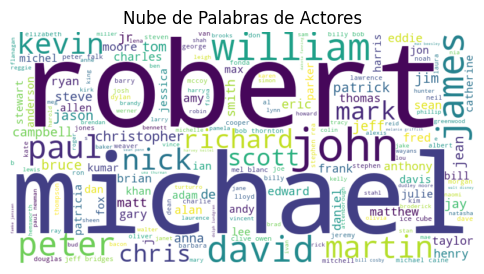

In [203]:
df_actor = pd.read_parquet(r'..\Datasets\actor_dataset.parquet')
# Combina todos los nombres de actores en una sola cadena
text_actors = " ".join(df_actor['actor_name'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_actors)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Actores')
plt.show()
# tenemos a john como el actor que mas se repite y es el que mas filmaciones tiene

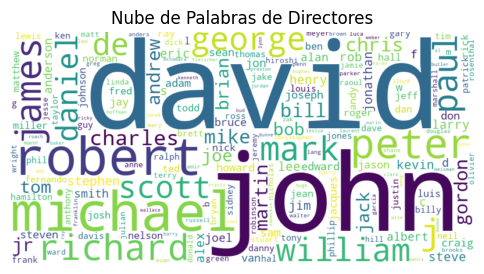

In [204]:
# Combina todos los nombres de directores en una sola cadena
df_director = pd.read_parquet(r'..\Datasets\director_dataset.parquet')
text_directors = " ".join(df_director['director_name'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_directors)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Directores')
plt.show()

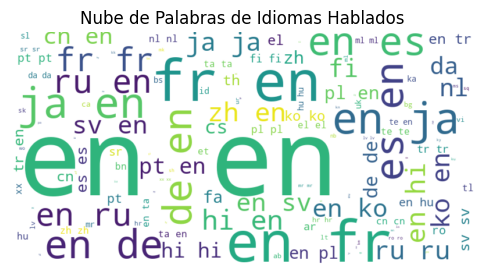

In [205]:
# Combina todos los idiomas en una sola cadena, el ingles y el frances son los mas mencionados, por eso usamos el idioma inglés como criterio para el filtrado de peliculas
df_idioma = pd.read_parquet(r'..\Datasets\datasetmovies_reducido.parquet')
text_languages = " ".join(df_idioma['original_language'].dropna())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_languages)

# Muestra la nube de palabras
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Idiomas Hablados')
plt.show()

In [206]:
# Verificar cantidad de títulos únicos para ver con cuánta información se dispone
num_unique_titles = df_completo['title'].nunique()
print(f"Cantidad de títulos únicos: {num_unique_titles}")

Cantidad de títulos únicos: 1507


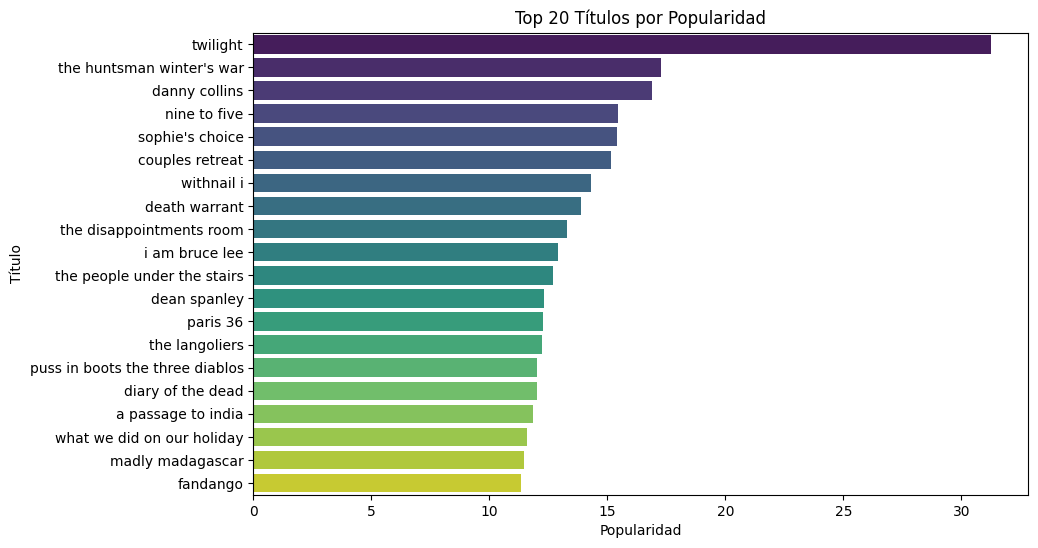

In [207]:
# Ordenar la distribución de titulos por popularidad
df_sorted = df_completo[['title', 'popularity']].sort_values(by='popularity', ascending=False)

# Seleccionar los Top 20 títulos más populares para una visualización más clara
top_n = 20
df_top_n = df_sorted.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='title', data=df_top_n, palette='viridis')
plt.title(f"Top {top_n} Títulos por Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Título")
plt.show()


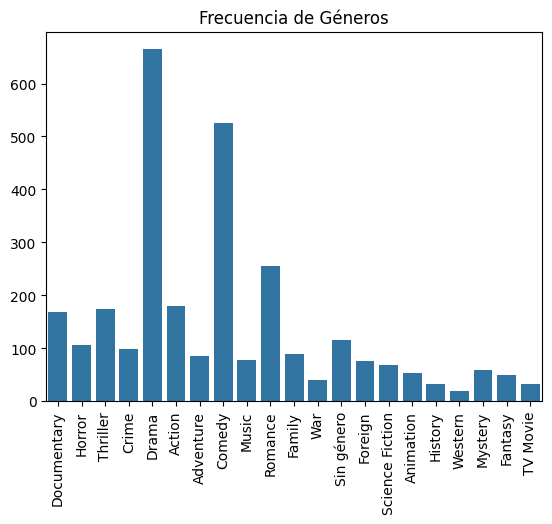

In [208]:
# Dividir la columna de géneros (si es una lista), los generos mas frecuentes son drama, comedia y romance
df_completo['generos'] = df_completo['generos'].str.split(',')

# Explorar la frecuencia de géneros
from collections import Counter
generos_flat = [item.strip() for sublist in df_completo['generos'].dropna() for item in sublist]
generos_counter = Counter(generos_flat)

# Mostrar los géneros más comunes
sns.barplot(x=list(generos_counter.keys()), y=list(generos_counter.values()))
plt.xticks(rotation=90)
plt.title("Frecuencia de Géneros")
plt.show()


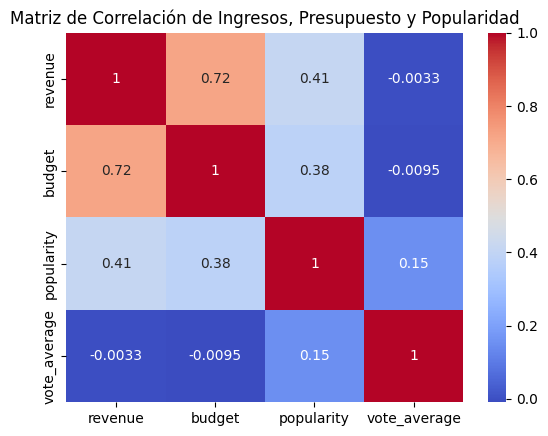

In [209]:
# Correlación entre Revenue, Budget y Popularity
# señal de que las películas con altos presupuestos tienden a tener más éxito financiero,
correlation_matrix = df_completo[['revenue', 'budget', 'popularity', 'vote_average']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Ingresos, Presupuesto y Popularidad")
plt.show()

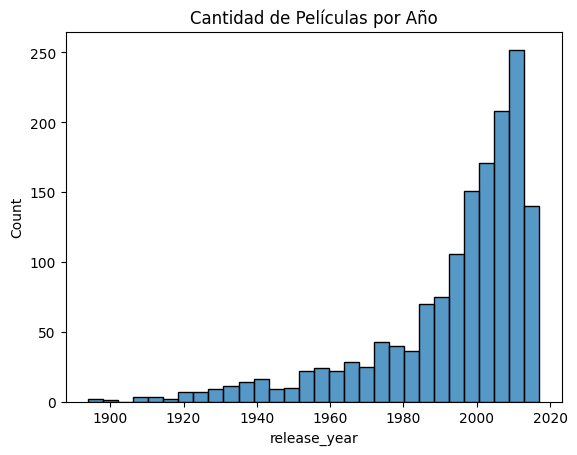

In [210]:
# Convertir a año
df_completo['release_year'] = pd.to_datetime(df_completo['release_date'], errors='coerce').dt.year

# Ver distribución por año de lanzamiento
sns.histplot(df_completo['release_year'], kde=False, bins=30)
plt.title("Cantidad de Películas por Año")
plt.show()


In [211]:
# Filtrar películas lanzadas a partir de 1980
df_post_1980 = df_completo[df_completo['release_year'] >= 1980]

# Contar cuántas películas tienes desde 1980
num_peliculas_post_1980 = df_post_1980.shape[0]
print(f"Cantidad de películas lanzadas a partir de 1980: {num_peliculas_post_1980}")
# Mostrar las primeras filas del DataFrame filtrado
df_post_1980.head()

Cantidad de películas lanzadas a partir de 1980: 1220


,title,generos,budget,revenue,vote_count,popularity,vote_average,release_date,release_year
0,10 questions for the dalai lama,[Documentary],0,0,3.0,0.721105,6.3,2006-05-01,2006
1,11-11-11,"[Horror, Thriller]",0,0,77.0,3.991610,4.3,2011-11-11,2011
2,131313,[Horror],0,0,15.0,1.714883,4.0,2013-09-30,2013
3,16 years of alcohol,"[Crime, Drama]",0,0,8.0,1.129269,6.8,2003-08-14,2003
4,18 fingers of death,"[Action, Adventure, Comedy]",0,0,3.0,0.142365,5.0,2006-04-11,2006


In [212]:
# Guardar el dataset en formato Parquet
df_completo.to_parquet(r'..\Datasets\dataset_completo.parquet')

In [213]:
df_actor = pd.read_parquet(r'..\Datasets\actor_dataset.parquet')
df_actor.tail(5) # para automatizar el proceso elaboramos ddatasets específicos para cada endpoint

,actor_name,title,revenue,budget,return
1502,amy brenneman,your friends neighbors,4710749,5000000,0.94215
1503,quentin tarantino,z channel a magnificent obsession,0,0,0.00000
1504,robert sapolsky,zeitgeist moving forward,0,0,0.00000
1505,david bowie,ziggy stardust and the spiders from mars,0,0,0.00000
1506,jessica alexandra green,zombie christ,0,5000,0.00000


In [214]:
df_director = pd.read_parquet(r'..\Datasets\director_dataset.parquet')
df_director.head(5)

,director_name,title,release_date,revenue,budget,return
0,rick ray,10 questions for the dalai lama,2006-05-01,0,0,0.0
1,darren lynn bousman,11-11-11,2011-11-11,0,0,0.0
2,james cullen bressack,131313,2013-09-30,0,0,0.0
3,richard jobson,16 years of alcohol,2003-08-14,0,0,0.0
4,james lew,18 fingers of death,2006-04-11,0,0,0.0


In [215]:
df_filmaciones = pd.read_parquet(r'..\Datasets\filmaciones.parquet')
df_filmaciones.tail(5)

,title,release_date
1502,your friends neighbors,1998-02-04
1503,z channel a magnificent obsession,2004-05-16
1504,zeitgeist moving forward,2011-01-15
1505,ziggy stardust and the spiders from mars,1973-12-23
1506,zombie christ,2010-10-27


In [216]:
df_score = pd.read_parquet(r'..\Datasets\score_titulo.parquet')
df_score.tail(5)

,title,release_date,vote_average,popularity
1502,your friends neighbors,1998-02-04,5.9,1.564774
1503,z channel a magnificent obsession,2004-05-16,7.4,1.422413
1504,zeitgeist moving forward,2011-01-15,6.9,2.688290
1505,ziggy stardust and the spiders from mars,1973-12-23,7.6,1.167518
1506,zombie christ,2010-10-27,1.0,0.137117


In [217]:
df_votos = pd.read_parquet(r'..\Datasets\votos_titulo.parquet')
df_votos.tail(5)

,title,vote_count,vote_average
1502,your friends neighbors,17.0,5.9
1503,z channel a magnificent obsession,12.0,7.4
1504,zeitgeist moving forward,70.0,6.9
1505,ziggy stardust and the spiders from mars,15.0,7.6
1506,zombie christ,1.0,1.0
